# Tanks

Another one of [Isaac Slavitt's examples](http://isaacslavitt.com/2015/12/19/german-tank-problem-with-pymc-and-pystan/) in `PyMC3`.

> Suppose four tanks are captured with the serial numbers 10, 256, 202, and 97. Assuming that each tank is numbered in sequence as they are built, how many tanks are there in total?

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as st

from utils import plt, sns

In [2]:
# Serial numbers of tanks
tanks = [10, 256, 202, 97]

In [3]:
# How many tanks are there?
with pm.Model() as model:
    # Prior
    upper = pm.DiscreteUniform("upper", lower=1, upper=1000)
    # Likelihood
    y = pm.DiscreteUniform("y", lower=1, upper=upper, observed=tanks)
    # Need more draws with the Metropolis sampler
    trace = pm.sample(draws=20000, njobs=4, chain=4)
    
burn_in = 10000
trace = trace[burn_in:]

Assigned Metropolis to upper
100%|██████████| 20000/20000 [00:02<00:00, 9027.48it/s]



upper:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  368.423          130.935          2.426            [256.000, 654.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  258.000        280.000        322.000        404.000        770.000

None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fbbba10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fe43e50>]], dtype=object)

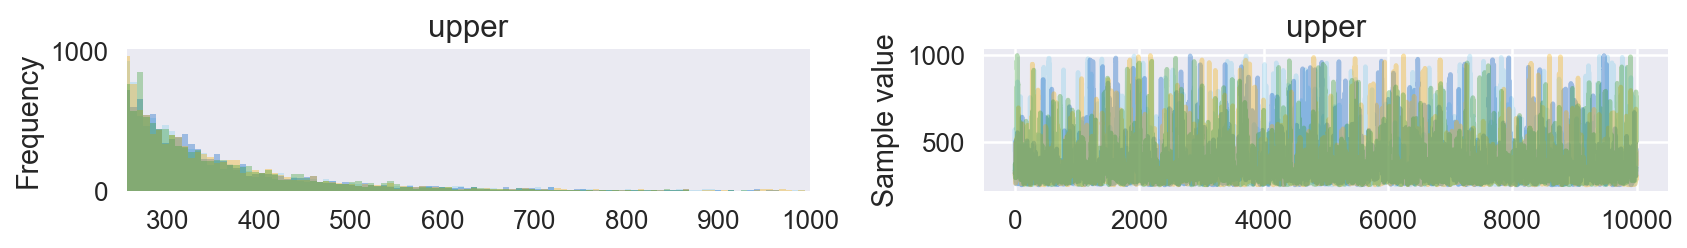

In [4]:
print(pm.summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ff97210>], dtype=object)

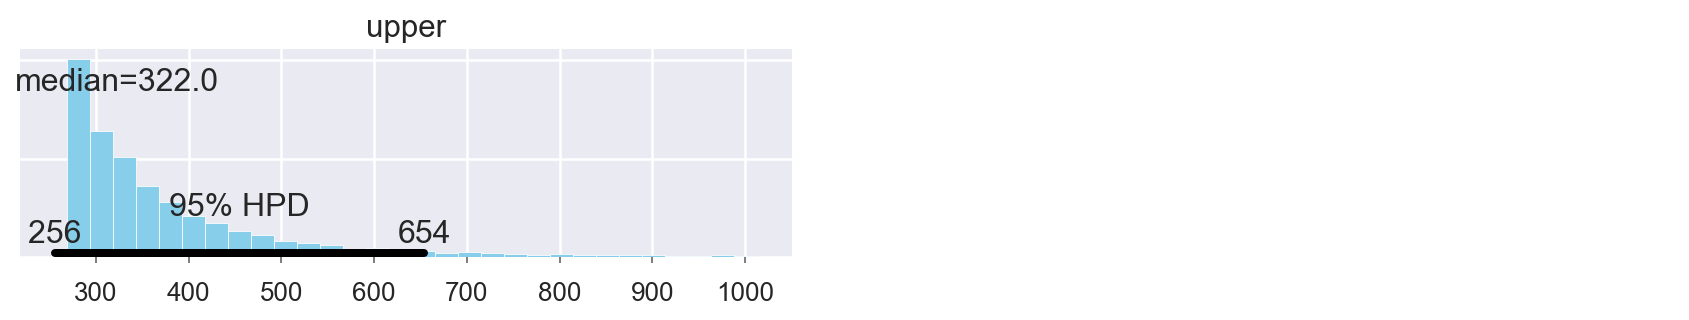

In [5]:
pm.plot_posterior(trace, point_estimate="median")

In [6]:
pm.diagnostics.gelman_rubin(trace)

{'upper': 1.0001622979327103}

## Using `NUTS` and `Uniform` distributions

In [7]:
# NUTS > Metropolis
with pm.Model() as nuts_model:
    # Prior
    upper = pm.Uniform("upper", lower=max(tanks), upper=10000)
    # Likelihood
    y = pm.Uniform("y", lower=1, upper=upper, observed=tanks)
    # Sample
    trace = pm.sample(draws=6000, tune=2000, njobs=4, chain=4)
    
burn_in = 2000
trace = trace[burn_in:]

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -26.933: 100%|██████████| 200000/200000 [00:10<00:00, 19472.45it/s]
Finished [100%]: Average ELBO = -26.935
100%|██████████| 6000/6000 [00:03<00:00, 1517.62it/s]



upper:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  387.982          254.898          3.952            [256.010, 702.143]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  257.919        283.064        324.578        407.615        887.592

None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111a345d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111a40c10>]], dtype=object)

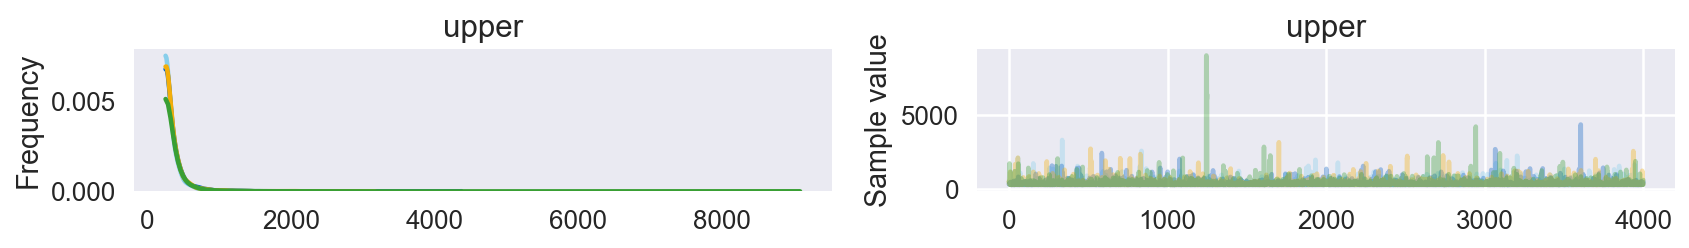

In [8]:
# Slightly higher 95% HPD interval
print(pm.summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x111070350>], dtype=object)

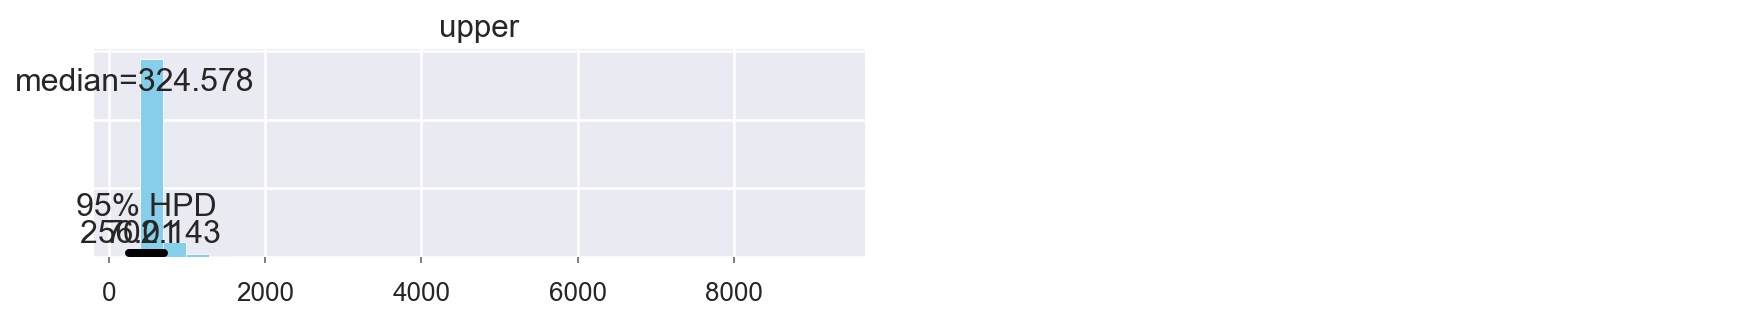

In [9]:
pm.plot_posterior(trace, point_estimate="median")

## Conclusion

Both models looked to predict a median slightly above `320` tanks.